<a href="https://colab.research.google.com/github/Eldow227/time_series/blob/main/MCSFT_net_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

In this project I want to present my skills in predicting time series using ARMA model.
In this example I use Microsoft net value data, because I think working on real data I much more interesting and instructive for future.



First let's import all important libraries and upload dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

raw = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MCSFT_net.txt")

raw

This cell here is for connecting my Google Drive with colab. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Now, let's prepare our data and set index as Date

In [ ]:
raw['Date'] = pd.to_datetime(raw['Date'])
raw = raw.set_index('Date')
raw.columns = ['net_value']

raw

Let's print some information about our dataset and descriptive statistics.

In [7]:

print('--------------------------------------------------------')
print('Data Info')
print('--------------------------------------------------------')
print(raw.info())
print()
print()

print('--------------------------------------------------------')
print('Data Description')
print('--------------------------------------------------------')
print(raw.describe().T)
print()
print()

--------------------------------------------------------
Data Info
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 54 entries, 2022-06-30 to 2009-03-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   net_value  54 non-null     float64
dtypes: float64(1)
memory usage: 864.0 bytes
None


--------------------------------------------------------
Data Description
--------------------------------------------------------
           count      mean       std    min   25%    50%      75%     max
net_value   54.0  7.429056  5.074797 -6.302  4.97  6.161  8.86075  20.505




At the bottom we see all important statistics.
The top shows us information of our dataset. We have only one column (net_value) which is type float.
We have no empty values.

Now, it would be useful to see how our time series looks alike.

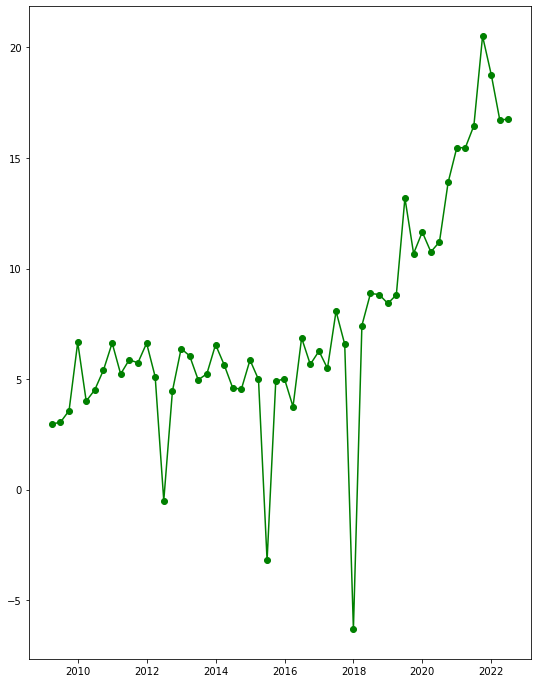

In [8]:
figure = plt.figure(figsize=(9, 12))
plt.plot(raw, '-o', c='g')
plt.show()

Well, that is not a time series we can predict. Unless not in this form. First assumption says, that predicted time series should be stationary, this one certainly is not.

We can try differentation to make it look more like stationary.


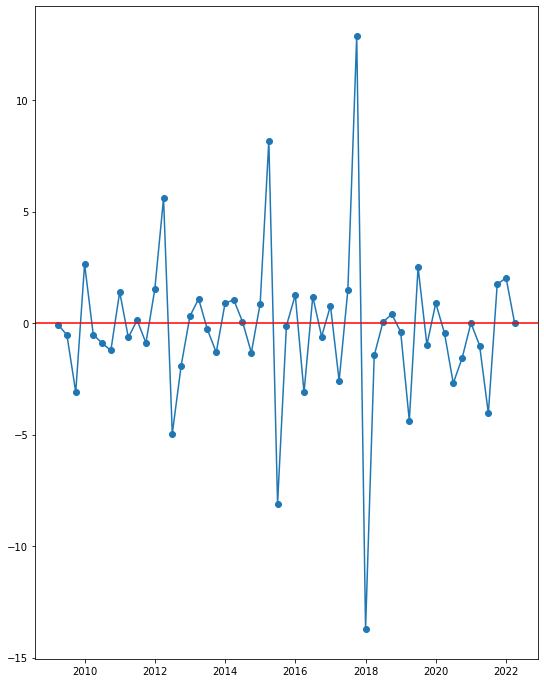

In [12]:
data = raw.diff(1).dropna()
figure = plt.figure(figsize=(9, 12))
_ = plt.plot(data, '-o')
_ = plt.axhline(y=0, c='r')

Now let's deal with outliers

In [28]:
def z_score(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  outlier = []
  for i in data:
    z = (i-mean)/std
    if z > threshold:
      outlier.append(i)
      
  return outlier

In [31]:
z_score(data['net_value'])
mean = data['net_value'].mean()

for i in data['net_value']:
  if i in z_score(data['net_value']):
    data['net_value'] = data['net_value'].replace([i], mean)

Alright, this one is possible to predict.
Let's see more.

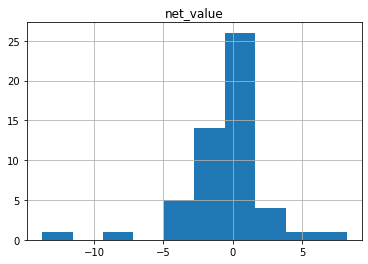

In [32]:
h = data.hist()

It looks like normal distribution, probably if we had more data it would look much better, but this is something we can accept.

We should print lagplot to see if our time series is linear.

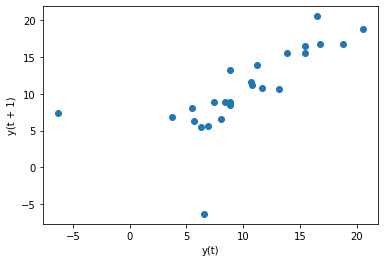

In [33]:
pd.plotting.lag_plot(raw)

It seems it is.

Seasonality tests.
****

Now we have to see if there is some seasonality in our time series.
It means we have to see if there are some periods where our time series behaves similar.

Now I will write code which will plot every single year on one plot, to see if there are some values where these plots behave similar.

<ipython-input-34-baf9c8249038>:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_1 = data.loc['2016-01-01':'2017-01-01']
<ipython-input-34-baf9c8249038>:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_2 = data.loc['2017-01-01':'2018-01-01']
<ipython-input-34-baf9c8249038>:6: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_3 = data.loc['2018-01-01':'2019-01-01']
<ipython-input-34-baf9c8249038>:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  s_4 = data.loc['2019-01-01':'2020-01-01']
<ipython-input-34-baf9c8249038>:8: FutureWar

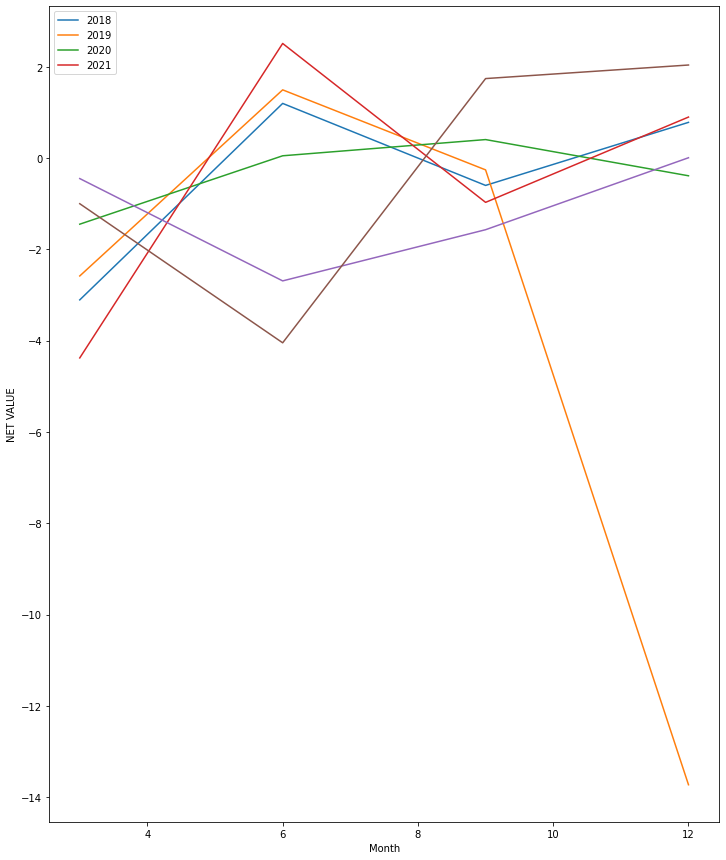

In [34]:
years = ['2018', '2019', '2020', '2021']

seasons = []
s_1 = data.loc['2016-01-01':'2017-01-01']
s_2 = data.loc['2017-01-01':'2018-01-01']
s_3 = data.loc['2018-01-01':'2019-01-01']
s_4 = data.loc['2019-01-01':'2020-01-01']
s_5 = data.loc['2020-01-01':'2021-01-01']
s_6 = data.loc['2021-01-01':'2021-12-31']
s_7 = data.loc['2022-01-01':]

seasons.append(s_1)
seasons.append(s_2)
seasons.append(s_3)
seasons.append(s_4)
seasons.append(s_5)
seasons.append(s_6)
seasons.append(s_7)

figure = plt.figure(figsize=(12, 15))
for season in seasons:
    plt.plot(season.index.month, season.net_value)
    plt.xlabel('Month')
    plt.ylabel('NET VALUE')
plt.legend([year for year in years])
plt.show()

We can see there are some moments in the year, where these plots behave similar. For example June seems to be the month where trend change. The same thing is for september.

Stationarity test
*****

Now, after differentation we still have to make sure that our time series is stationary. In order to do so I will use ADF and KPSS test.

In [35]:

print(sm.tsa.stattools.kpss(data))
print()
print(sm.tsa.stattools.adfuller(data))

(0.2008418228389958, 0.1, 11, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

(-6.917597152939014, 1.1685925016340816e-09, 1, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 215.68848537295872)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


KPSS p-value: 0.1 which means we cannnot reject H0, so probably our time series is stationary.

ADF p-value: 5.234160409720518e-09 which is less than 0.05 so probably our time series is stationary.


We have confirmed stationarity with two tests. Now we can move to testing for autocorrelation.

Autocorrelation test
*****

To test if our time series is autocorrelated I use acf and pacf. To see if there is autocorrelation and see it's grade I plot these tests for each grade.


Figure(432x288)


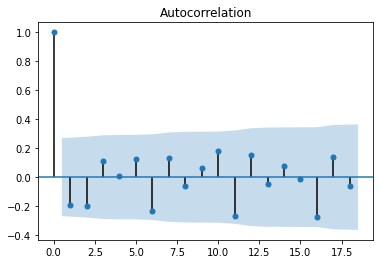

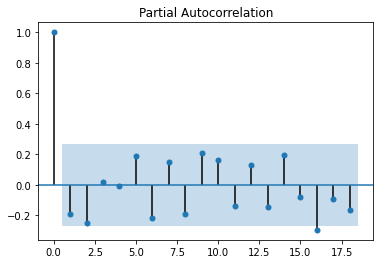

In [36]:

sm.graphics.tsa.plot_acf(data)
print()
print(sm.graphics.tsa.plot_pacf(data))

We can see that ACF shows first grade autocorrelation and PACF shows second grade autocorrelation.
Now we can move to modelling our time series.

Model
*****

In [37]:
raw = raw.iloc[::-1]
raw = raw.loc['2016'::]

<ipython-input-37-2cfb8191cf66>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  raw = raw.loc['2016'::]


Let's define our model, I will use auto arima to get optimal model for this case. I also set criterion for aicc, and define other parameters like stationarity, autocorrelations grade and seasonality.

In [38]:
import pmdarima

auto = pmdarima.auto_arima(raw, information_criterion="aicc", stationary=True, max_d=2, m=4, seasonal = True, maxd=2, trace=True)
print(auto.summary())

Performing stepwise search to minimize aicc
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AICC=148.433, Time=0.32 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AICC=142.860, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AICC=134.389, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[4] intercept   : AICC=137.374, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AICC=176.021, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AICC=132.772, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[4] intercept   : AICC=134.364, Time=0.09 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AICC=137.568, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[4] intercept   : AICC=134.729, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[4] intercept   : AICC=133.839, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[4] intercept   : AICC=137.272, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[4] intercept   : AICC=inf, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[4]             : AICC=134.693, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[4] intercept
Total fit time: 1.154 seconds
                         

We can see our results, auto_arima decided that best model is SARIMAX(1, 0, 1) with AIC 131.439.
Let's see our predictions and how this model works.

<Figure size 648x864 with 0 Axes>

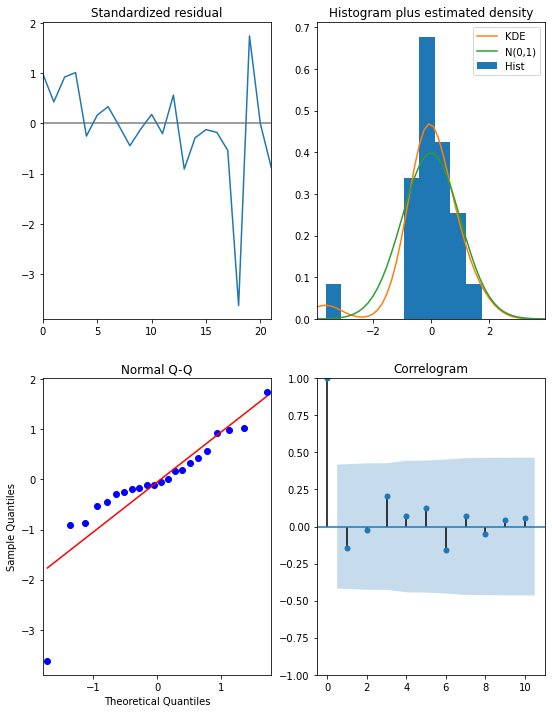

In [39]:
figure = plt.figure(figsize=(9, 12))
_ = auto.plot_diagnostics(figsize=(9,12))
plt.show()

We can see that our model shows heteroskedascity of residuals.
Probably removing outliers would have helped.
Fortunetly there is no aoutocorrelation of residuals and residuals seems to be normaly distributed.

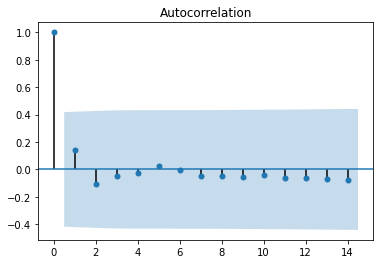

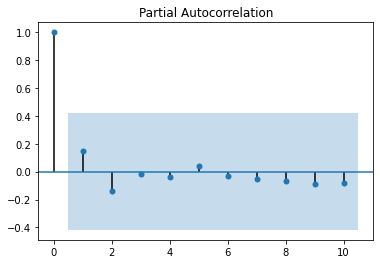

Date
2022-06-30     30.314952
2022-03-31      3.145487
2021-12-31     14.582168
2021-09-30     17.491258
2021-06-30      1.082571
2021-03-31      0.480388
2020-12-31      1.891939
2020-09-30      0.039433
2020-06-30      3.344231
2020-03-31      0.211977
2019-12-31      0.548572
2019-09-30      0.699646
2019-06-30      5.422650
2019-03-31     14.022615
2018-12-31      1.381693
2018-09-30      0.258680
2018-06-30      0.536688
2018-03-31      4.904892
2017-12-31    223.849675
2017-09-30     51.711647
2017-06-30      0.000310
2017-03-31     13.028018
dtype: float64


In [40]:
resid = auto.resid()
resid = pow(resid, 2)
sm.graphics.tsa.plot_acf(resid)
plt.show()
sm.graphics.tsa.plot_pacf(resid, lags=10)
plt.show()

print(resid)

Predictions
*****

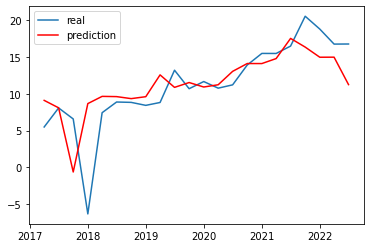

In [41]:
in_sample = auto.predict_in_sample(raw)
pred = in_sample
pred.columns = ['net_value']

real = plt.plot(raw, label='real')
pred_ = plt.plot(pred, label='prediction', c='r')
plt.legend()
plt.show()


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  # Handle slices (if the given index keys cover more than one date)


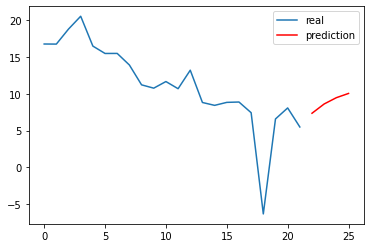

In [44]:
plt.show()
prediction_OS = auto.predict(n_periods=4)
v = plt.plot(raw.values, label='real')
b = plt.plot(prediction_OS, label='prediction', c='r')
plt.legend()
plt.show()

It seems our model is a little delayed.
Maybe we should try different approach.

ARIMA model uses OLS estimator, maybe to increase our models accuracy we should try different one.
In this case I will use WLS, because our model I heteroskedascit and WLS should do the job.

----------------------------------------------
****

WLS
---------

In [45]:
raw = raw.iloc[::-1]
raw['intercept'] = 1
data = raw.diff(1)
df = data.dropna()

<ipython-input-45-ab1857ae7ba3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['intercept'] = 1


Here I define function, which does ARIMA but with WLS 

In [46]:
def auto_reg(data):
    data['Shifted_1'] = data['net_value'].shift()
    data['Shifted_2'] = data['net_value'].shift(periods=2)
    data_X = pd.DataFrame()

    data_X['Shift_1'] = data['Shifted_1']
    data_X['Shift_2'] = data['Shifted_2']
    data_X['Intercept'] = data['intercept']

    data = data.dropna()
    data_X = data_X.dropna()

    y = data['net_value'].values
    x = data_X.values


    X = sm.add_constant(x)
    model = sm.WLS(y, X).fit()


    return model

Let's do our model.

In [47]:
print(auto_reg(df).summary())


                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.268
Model:                            WLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     2.924
Date:                Tue, 27 Dec 2022   Prob (F-statistic):             0.0827
Time:                        14:54:50   Log-Likelihood:                -53.248
No. Observations:                  19   AIC:                             112.5
Df Residuals:                      16   BIC:                             115.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0454      1.022      1.023      0.3

<ipython-input-46-77018a714c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_1'] = data['net_value'].shift()
<ipython-input-46-77018a714c64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_2'] = data['net_value'].shift(periods=2)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/usr/local/lib/python3.8/dist-packages/s

Summary shows AIC 112 which is better than previous models, but let's see diagnostics first before getting any predictions.

Resids Autocorrelation
*****

<ipython-input-46-77018a714c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_1'] = data['net_value'].shift()
<ipython-input-46-77018a714c64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_2'] = data['net_value'].shift(periods=2)


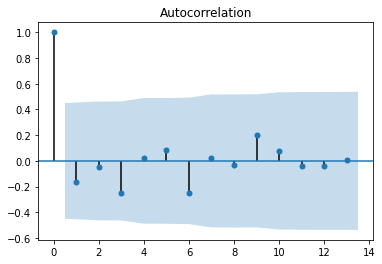

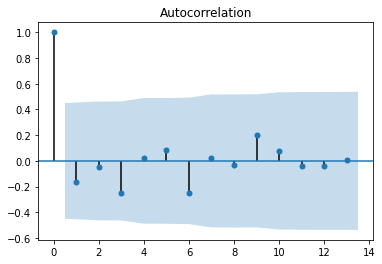

In [48]:
resid = auto_reg(df).resid
resid = pd.DataFrame(resid)

sm.graphics.tsa.plot_acf(resid)

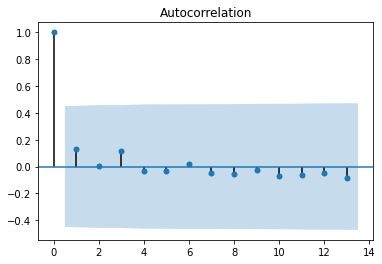

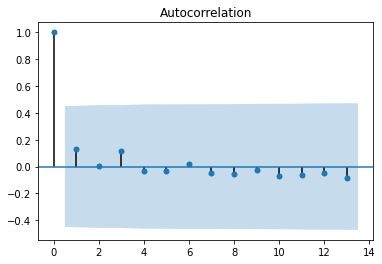

In [49]:
sm.graphics.tsa.plot_acf(pow(resid, 2))

There is no autocorrelation of residuals.

Let's see how standardized residuals look alike.
*****

In [50]:
from sklearn import preprocessing
resid = resid
scaler = preprocessing.StandardScaler().fit(resid)
standarized = scaler.transform(resid)

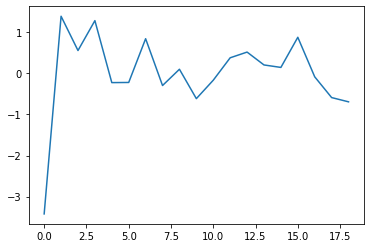

In [51]:
plt.plot(standarized)

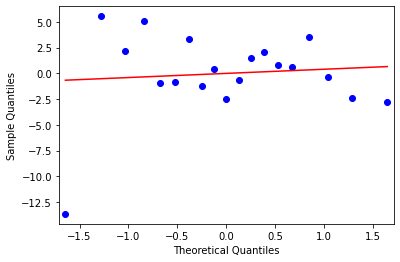

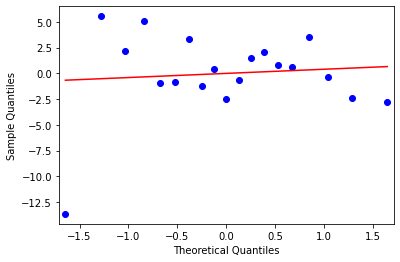

In [54]:
sm.qqplot(resid, line="r")

In [57]:
resid.describe()

,0
count,1.900000e+01
mean,2.337312e-16
std,4.098572e+00
min,-1.364892e+01
25%,-1.036610e+00
50%,4.017127e-01
75%,2.146142e+00
max,5.550801e+00


In [ ]:
df.size

212

In [58]:
pred = auto_reg(df).predict(df)
pred.size

<ipython-input-46-77018a714c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_1'] = data['net_value'].shift()
<ipython-input-46-77018a714c64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_2'] = data['net_value'].shift(periods=2)


21

<ipython-input-46-77018a714c64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_1'] = data['net_value'].shift()
<ipython-input-46-77018a714c64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Shifted_2'] = data['net_value'].shift(periods=2)


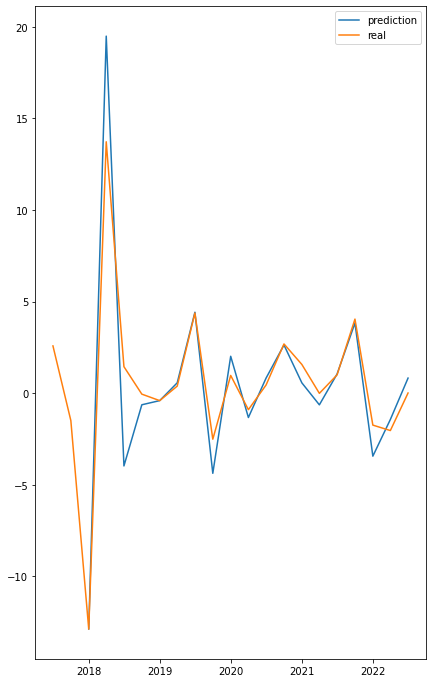

In [60]:

figure = plt.figure(figsize=(7, 12))
_ = plt.plot(auto_reg(df).predict(df), label='prediction')
_  = plt.plot(df['net_value'], label='real')
plt.legend()

Now our predictions look much better than previous models, even though it's far from perfection, we can easliy predict future values with some error. 

# SUMMARY
It seems our OLS estimator could not deal with this time series, that's why we had to use WLS which showed better results.
But in the end let's summarize what we have done here.

1. We cleaned our dataset and prepared it for analysis.
2. We make sure we are working on stationary time series. As it turned out it wasn't at the beginning, so we had to differeate it.
3. Then we dealt with outliers, which could dissrupt our model.
4. After preprocessing we checked assumptions (Stationarity, Autocorrelation, Normal Distribution etc.)
5. We managed to create model using auto_arima. Unfortunately It turned out homoskedascity assumption has not been confirmed. Moreover predictions of our model were far from accurate, and we could not use it for predictions.
6. Finaly we tried using WLS estimator to deal with heteroskedascity and imporve our model. In the ent it turned out WLS was a good decision to make and prediction of our model improved a lot.


